In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("D:\Sem-2\OASIS LMF PROJECT\himalayanandNE")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\1626791418.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("D:\Sem-2\OASIS LMF PROJECT\himalayanandNE")


In [4]:
df

,time,latitude,longitude,depth,mag,place,event_type
0,2025-06-22 13:52:17.981,34.1721,80.1492,10.000,4.30,"236 km E of Leh, India",earthquake
1,2025-06-10 02:05:40.761,29.0815,86.7341,10.000,4.20,"125 km N of Lobuche, Nepal",earthquake
2,2025-06-09 23:31:14.481,26.4331,96.8788,10.000,4.20,"26 km NNE of Sarupathar, India",earthquake
3,2025-06-05 20:50:10.389,34.3899,89.4861,10.000,4.20,Xizang-Qinghai border region,earthquake
4,2025-06-05 04:45:13.656,26.5908,96.6338,99.461,4.40,"46 km NNW of Sarupathar, India",earthquake
...,...,...,...,...,...,...,...
5885,1970-03-16 03:47:03.810,34.0220,86.3380,15.000,5.13,western Xizang,earthquake
5886,1970-03-10 05:20:09.600,26.8320,96.9580,15.000,5.44,"70 km NNE of Sarupathar, India",earthquake
5887,1970-02-26 19:30:06.160,27.6530,85.9140,10.000,5.41,"34 km S of Kod?ri??, Nepal",earthquake
5888,1970-02-19 07:10:04.200,27.4440,93.9730,20.000,5.40,"21 km SE of Ziro, India",earthquake


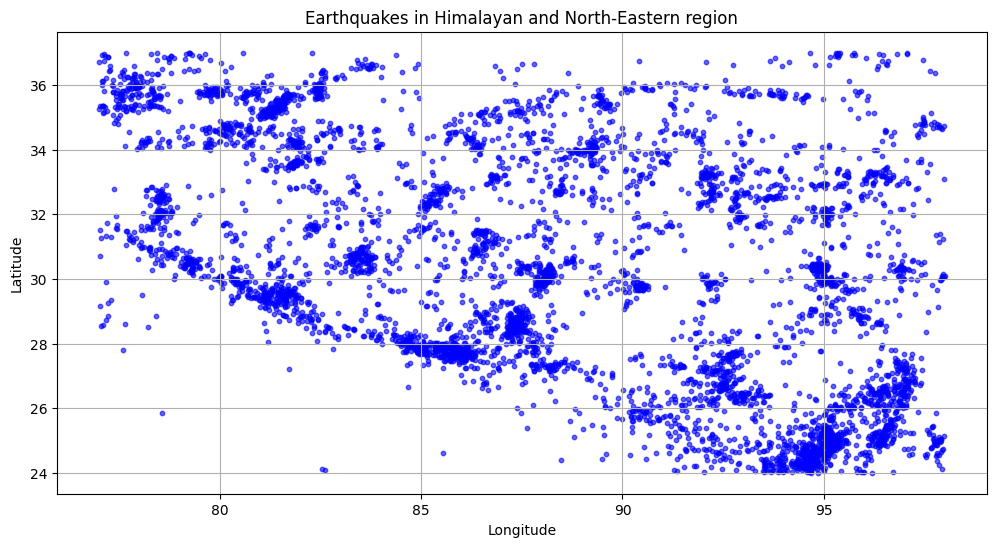

In [5]:
import matplotlib.pyplot as plt

# Plot spatial distribution before and after ETAS declustering
plt.figure(figsize=(12, 6))

# All events (before declustering)

plt.scatter(df["longitude"], df["latitude"], s=10, c="blue", alpha=0.6)
plt.title("Earthquakes in Himalayan and North-Eastern region")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

In [6]:
df =df[df["mag"]>=4.50]

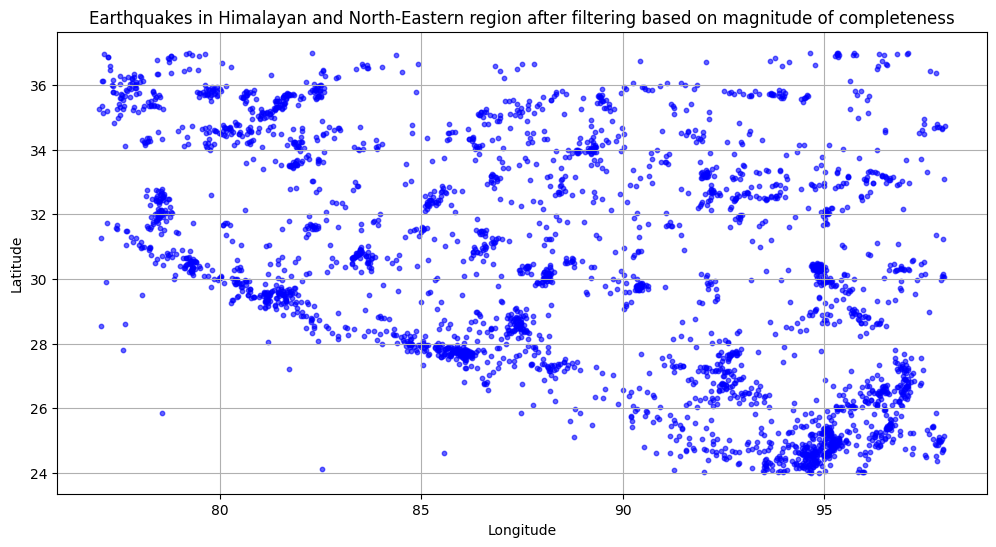

In [8]:
import matplotlib.pyplot as plt

# Plot spatial distribution before and after ETAS declustering
plt.figure(figsize=(12, 6))

# All events (before declustering)

plt.scatter(df["longitude"], df["latitude"], s=10, c="blue", alpha=0.6)
plt.title("Earthquakes in Himalayan and North-Eastern region after filtering based on magnitude of completeness")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

In [9]:
len(df)

3164

##  In order to implement the GEAR1 model, we first need to implement the two Parent models mentioned in the paper and then based on the GEAR1 model take an hybrid of the two to estimate the collective occurence rate

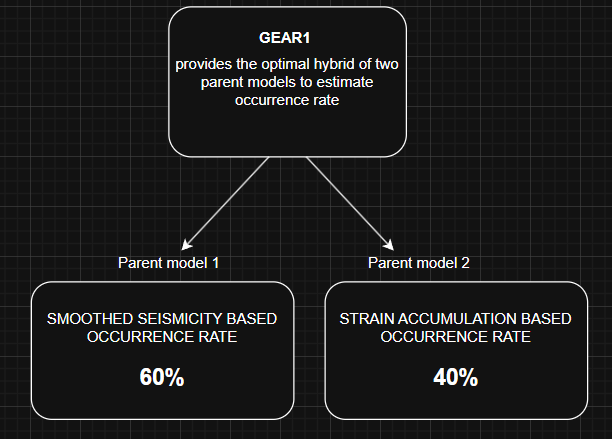

## AIM : ESTIMATION OF OCCURENCE RATE USING SMOOOTHED SEISMICITY 

### The model has been implemented based on the research paper "Whole Earth high-resolution earthquake forecasts" by Yan Y. Kagan and David D. Jackson

## In order to estimate the occurrence rates throughout a spatial region, we need to smooth the seismicity around the known earthquake points in our catalog

## Smoothing can be achieved by defining spatial kernels around the known earthquake points. The spatial kernel can be formed using two distributions, one is the POWER LAW distribution and the second being the spherical FISHER distribution

## The Power Law distribution assumes a flat surface to perform the spatial smoothing , but in reality the Earth is a sphere due to which the Fisher distribution models the estimation of occurrence rates better. Also the Power Law distribution is heavy tailed due to which even the low seismic activity regions are assigned very high occurence rates.

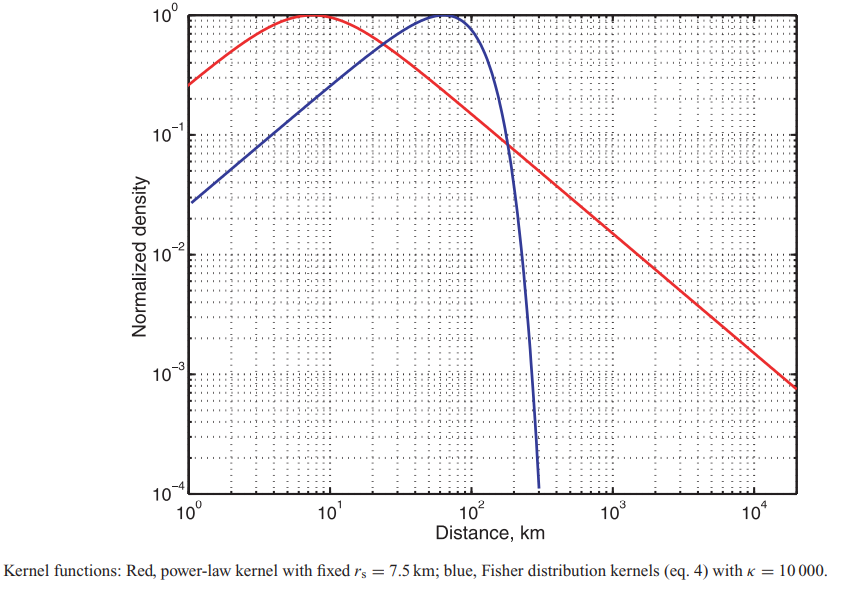

## the Fisher distribution is analogous to the Gaussion/Normal distribution but on a sphere  (to capture the actual geometry of the Earth)

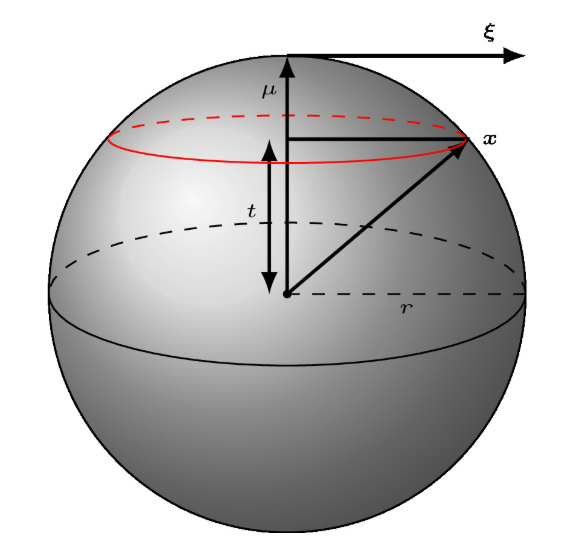

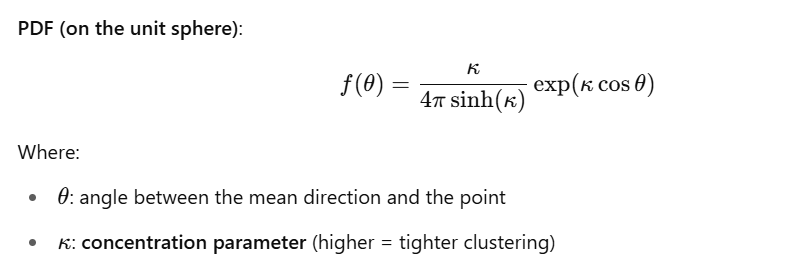

### the parameter k is analogous to 1/variance

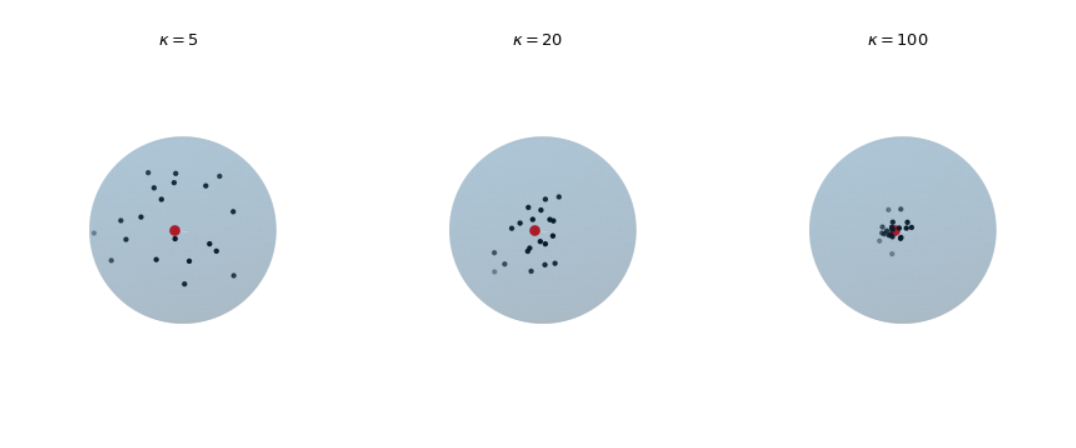

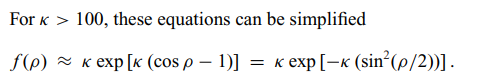

## The distribution assigns higher probability density to points lying closer to the mean (epicenter in consideration).

## Now for each earthquake point in the catalog we assume it as the u and estimate the probability densities of all other earthquake epicentres in the catalog (no spatial cut off), and then sum all the probability densities corresponding to that epicentre. those points lying in a highly clustered region will have a higher sum than those lying in the region with very few earthquakes

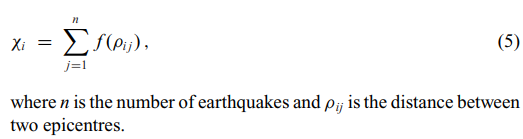

In [10]:
import numpy as np
from geopy.distance import great_circle

def fisher_kernel_distance(lat1, lon1, lat2, lon2, kappa):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    delta = np.arccos(
        np.sin(lat1) * np.sin(lat2) +
        np.cos(lat1) * np.cos(lat2) * np.cos(lon2 - lon1)
    )
    return np.exp(-kappa * np.sin(delta / 2)**2)

kappa0 = 1000
n = len(df)
chi = np.zeros(n)

for i in range(n):
    lat1, lon1 = df.iloc[i][['latitude', 'longitude']]
    chi[i] = np.sum([
        fisher_kernel_distance(lat1, lon1, df.iloc[j]['latitude'], df.iloc[j]['longitude'], kappa0)
        for j in range(n)
    ])


C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\1026030000.py:7: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(
C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\1026030000.py:7: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(
C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\1026030000.py:7: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(
C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\1026030000.py:7: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(
C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\1026030000.py:7: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(
C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\1026030000.py:7: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(
C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\1026030000.py:7: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(
C:\Users\aayan\AppDa

In [11]:
alpha = 0.5

## now instead of a constant width kernel ( ie same for all the earthquake points), we need an ADAPTIVE KERNEL that assigns a narrow kernel to points lying in high density/ clustered region and a wider kernel to points lying in a region with very few earthquakes

### we first compute the geometric mean of all the Xi's

In [12]:
# Avoid log(0): mask zeros
chi_safe = chi[chi > 0]

# Compute geometric mean only on non-zero chi
chi_g = np.exp(np.mean(np.log(chi_safe)))



## this Geometric mean helps us define the local bandwidth factors for each earthquake epicenter, using the followig equation:

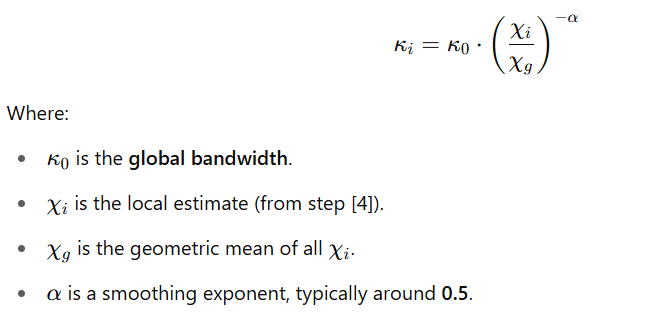

## based on this each earthquake point has its own defined kernel based on the local density around that point. If a point has a higher sum (Xi) than the geometric mean (Xg) , it would be assigned a narrower kernel (ki) than that of a point which has a lower sum than the geometric mean

In [13]:
# Assign kappa only where chi > 0, else use fallback (e.g., min valid kappa or epsilon)
df['kappa'] = np.where(
    chi > 0,
    kappa0 * (chi / chi_g) ** (-alpha),
    np.nan  # OR: kappa0 * (min(chi_safe)/chi_g)**(-alpha)
)

C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\299812036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kappa'] = np.where(


In [15]:
df

,time,latitude,longitude,depth,mag,place,event_type,kappa
5,2025-06-03 23:13:06.818,33.5257,81.8743,10.000,4.70,western Xizang,earthquake,958.780468
8,2025-05-27 20:24:28.119,24.4467,93.8427,49.996,5.10,"8 km SE of Moirāng, India",earthquake,925.089824
10,2025-05-22 20:03:50.879,29.4720,80.4663,10.000,4.60,"22 km NNW of Dadeldhurā, Nepal",earthquake,1077.054269
12,2025-05-18 17:30:49.832,33.7183,90.7410,10.000,4.50,"277 km NNW of Nagqu, China",earthquake,1031.132405
14,2025-05-11 21:11:22.060,29.0536,87.6068,9.000,5.50,"126 km W of Rikaze, China",earthquake,902.276057
...,...,...,...,...,...,...,...,...
5885,1970-03-16 03:47:03.810,34.0220,86.3380,15.000,5.13,western Xizang,earthquake,1032.449583
5886,1970-03-10 05:20:09.600,26.8320,96.9580,15.000,5.44,"70 km NNE of Sarupathar, India",earthquake,932.019397
5887,1970-02-26 19:30:06.160,27.6530,85.9140,10.000,5.41,"34 km S of Kod?ri??, Nepal",earthquake,972.937877
5888,1970-02-19 07:10:04.200,27.4440,93.9730,20.000,5.40,"21 km SE of Ziro, India",earthquake,841.709492


## We divide the region into grid cells of 0.5 x 0.5 degrees (55 x 55)km^2 per grid cell

In [14]:
lat_bins = np.arange(24, 37.1, 0.5)
lon_bins = np.arange(78, 97.1, 0.5)
grid = [(lat, lon) for lat in lat_bins for lon in lon_bins]

## for each grid cell we calculate the occurence using the equation below:

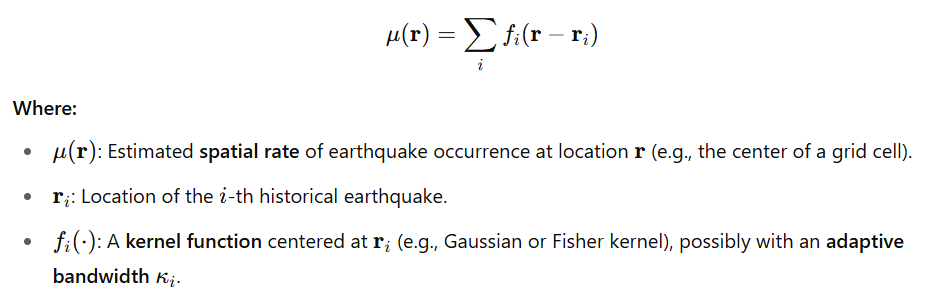

In [16]:
occurrence_map = []

for (grid_lat, grid_lon) in grid:
    mu = 0
    for i in range(n):
        lat1, lon1 = df.iloc[i][['latitude', 'longitude']].values
        kappa_local = df.iloc[i]['kappa']
        
        if np.isnan(kappa_local):
            continue
        
        rho = great_circle((lat1, lon1), (grid_lat, grid_lon)).km / 6371
        
        s = np.sin(rho / 2)
        exponent = -kappa_local * s * s

        if exponent < -700:  
            mu_term = 0.0
        else:
            mu_term = kappa_local * np.exp(exponent)

        mu += mu_term

        # print(mu)
    
    occurrence_map.append({'lat': grid_lat, 'lon': grid_lon, 'mu': mu})

## Normalizing the values

In [17]:
# Extract raw mu values
mu_values = [point['mu'] for point in occurrence_map]
total_mu = np.sum(mu_values)

# Normalize
for point in occurrence_map:
    point['mu'] /= total_mu

In [18]:
occurrence_df = pd.DataFrame(occurrence_map)

In [116]:
occurrence_df

,lat,lon,mu
0,24.0,78.0,0.000037
1,24.0,78.5,0.000046
2,24.0,79.0,0.000056
3,24.0,79.5,0.000067
4,24.0,80.0,0.000079
...,...,...,...
1048,37.0,95.0,0.000411
1049,37.0,95.5,0.000390
1050,37.0,96.0,0.000364
1051,37.0,96.5,0.000334


# HEATMAP OF THE OCCURRENCE RATE

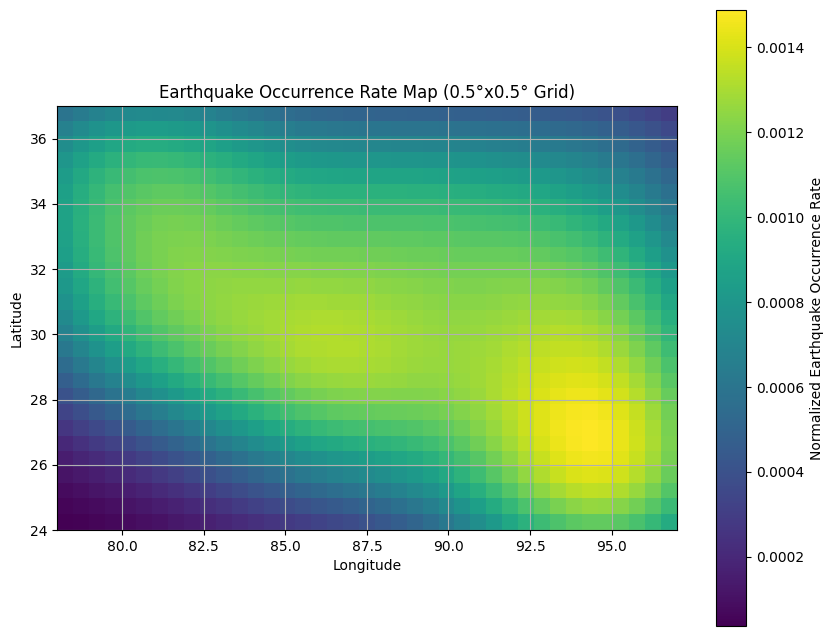

In [20]:
heatmap_df = occurrence_df.pivot(index='lat', columns='lon', values='mu')
heatmap_df = heatmap_df.sort_index(ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(heatmap_df, cmap='viridis', extent=[
    occurrence_df['lon'].min(), occurrence_df['lon'].max(),
    occurrence_df['lat'].min(), occurrence_df['lat'].max()
])
plt.colorbar(label='Normalized Earthquake Occurrence Rate')
plt.title('Earthquake Occurrence Rate Map (0.5°x0.5° Grid)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

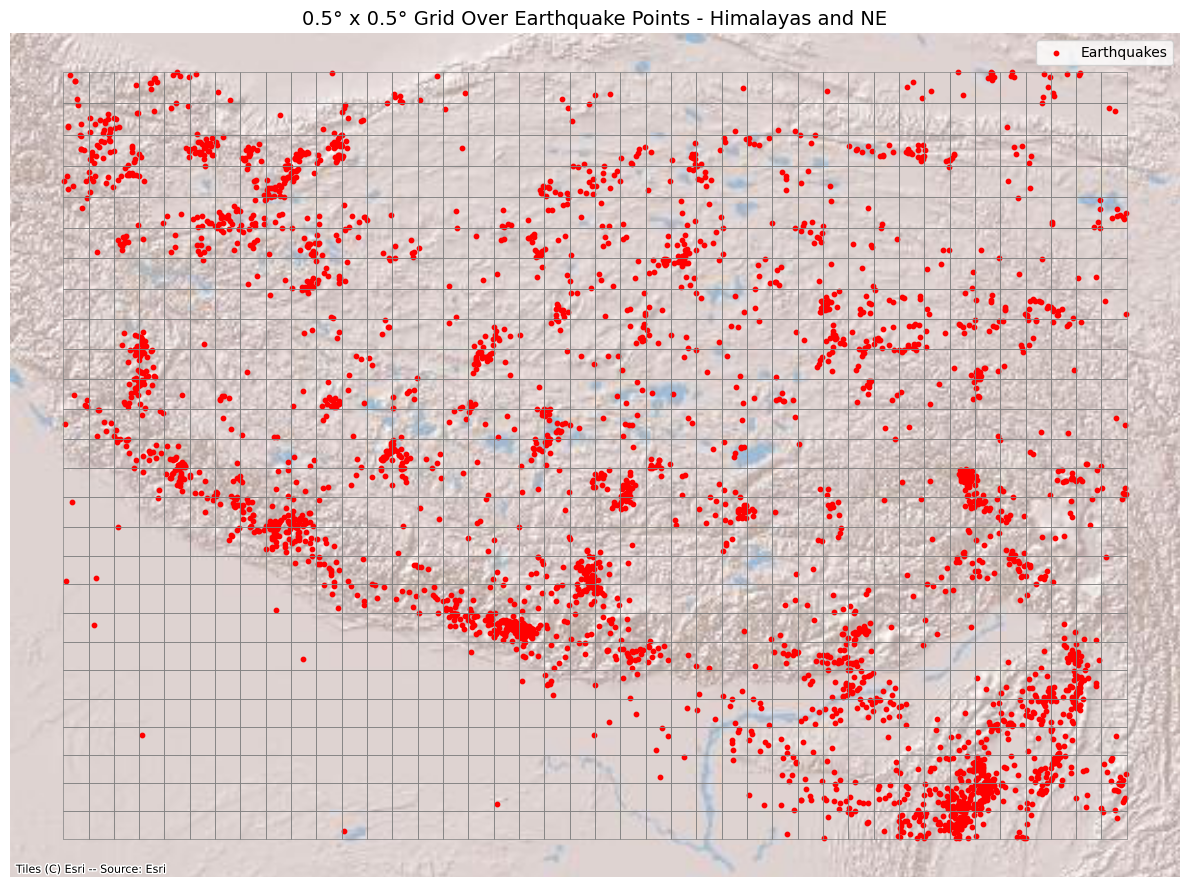

In [22]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import box, Point


min_lat, max_lat = df['latitude'].min(), df['latitude'].max()
min_lon, max_lon = df['longitude'].min(), df['longitude'].max()


lat_range = (np.floor(min_lat * 2) / 2, np.ceil(max_lat * 2) / 2)
lon_range = (np.floor(min_lon * 2) / 2, np.ceil(max_lon * 2) / 2)

grid_size = 0.5  # degrees
grid_cells = []

for lat in np.arange(lat_range[0], lat_range[1], grid_size):
    for lon in np.arange(lon_range[0], lon_range[1], grid_size):
        cell = box(lon, lat, lon + grid_size, lat + grid_size)
        grid_cells.append(cell)

grid_gdf = gpd.GeoDataFrame(geometry=grid_cells, crs="EPSG:4326")
grid_gdf = grid_gdf.to_crs(epsg=3857)



df_eq = df.dropna(subset=['latitude', 'longitude'])  # Drop NaNs
eq_geometry = [Point(xy) for xy in zip(df_eq['longitude'], df_eq['latitude'])]
eq_gdf = gpd.GeoDataFrame(df_eq, geometry=eq_geometry, crs="EPSG:4326")
eq_gdf = eq_gdf.to_crs(epsg=3857)


fig, ax = plt.subplots(figsize=(12, 10))

grid_gdf.boundary.plot(ax=ax, linewidth=0.5, edgecolor='gray')

eq_gdf.plot(ax=ax, color='red', markersize=10, label='Earthquakes')

# Basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldShadedRelief)

ax.set_title("0.5° x 0.5° Grid Over Earthquake Points - Himalayas and NE", fontsize=14)
ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()


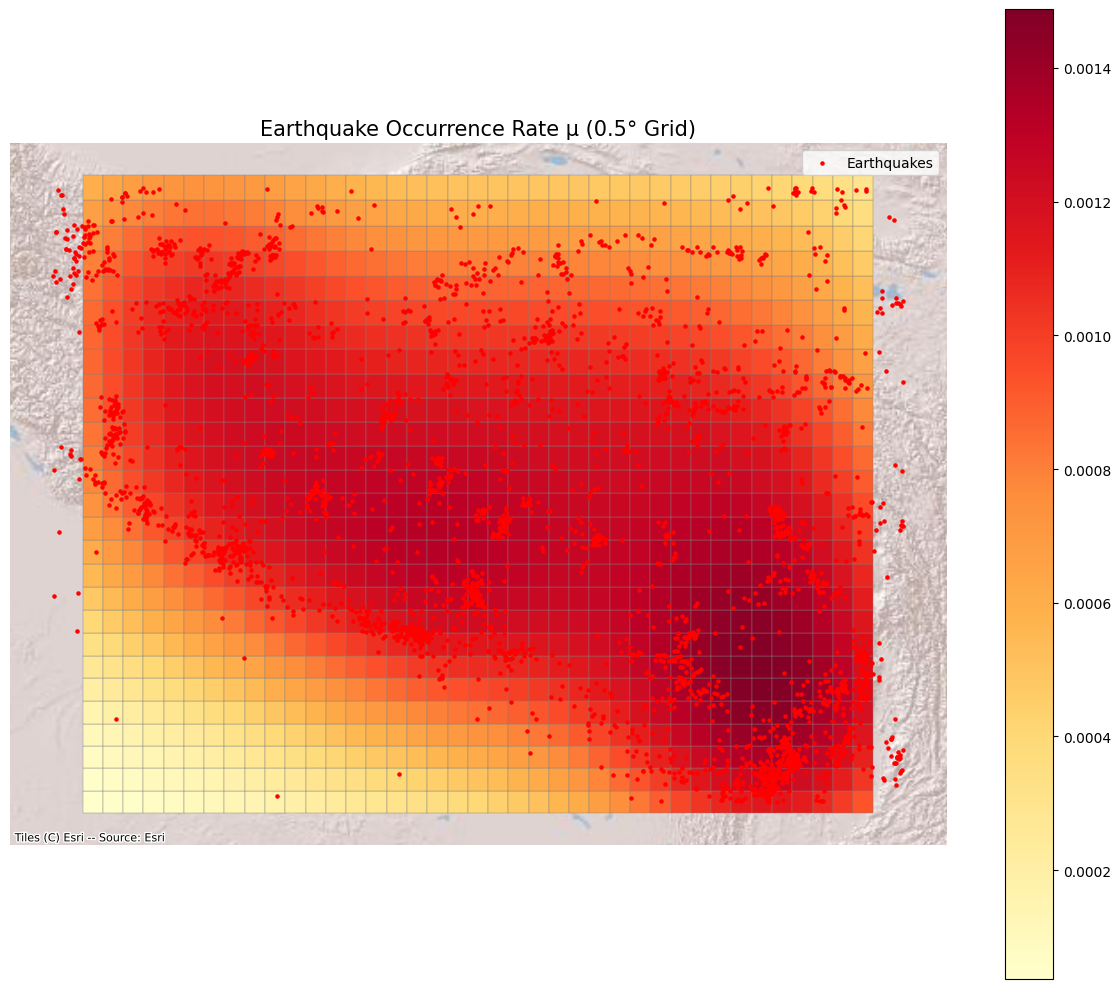

In [30]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import box, Point
import contextily as ctx


grid_size = 0.5  # degrees
geometry = []

for _, row in occurrence_df.iterrows():
    lat, lon = row['lat'], row['lon']
    cell = box(lon - grid_size/2, lat - grid_size/2,
               lon + grid_size/2, lat + grid_size/2)
    geometry.append(cell)


gdf_grid = gpd.GeoDataFrame(occurrence_df.copy(), geometry=geometry, crs="EPSG:4326")
gdf_grid = gdf_grid.to_crs(epsg=3857)


gdf_quakes = gpd.GeoDataFrame(
    df,  # assuming 'df' has earthquake data with 'latitude' and 'longitude'
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
).to_crs(epsg=3857)


fig, ax = plt.subplots(figsize=(12, 10))

gdf_grid.plot(ax=ax, column='mu', cmap='YlOrRd', edgecolor='gray', linewidth=0.3, legend=True)

# Overlay earthquakes
gdf_quakes.plot(ax=ax, color='red', markersize=5, label='Earthquakes')

# Basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldShadedRelief)

ax.set_title("Earthquake Occurrence Rate μ (0.5° Grid)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.legend()
plt.show()


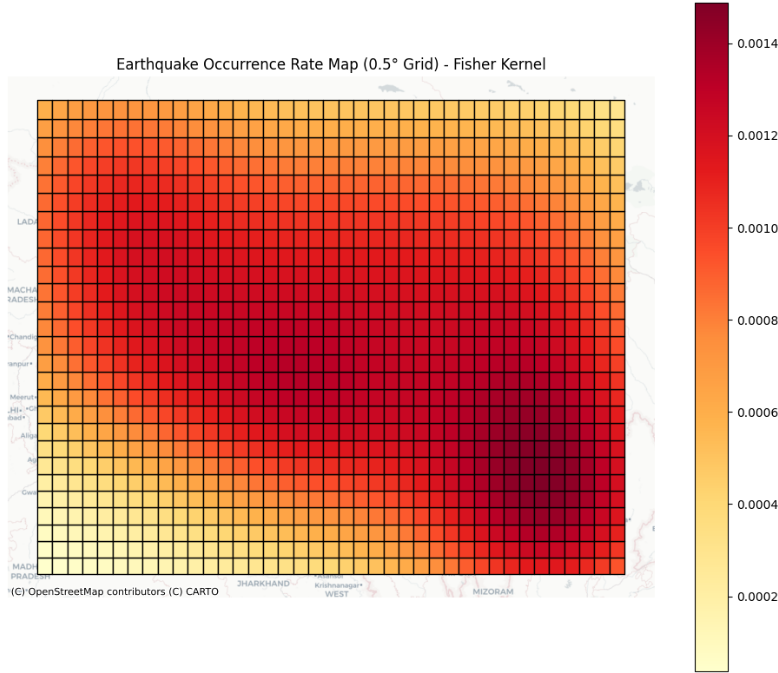

In [32]:
merged_df_sorted = pd.read_csv("merged_df_sorted")

# EVALUATION

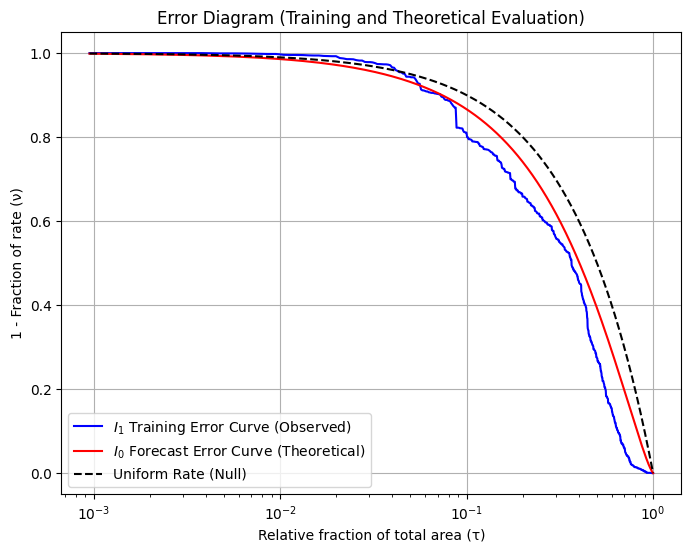

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Extract τ (cumulative area fraction) and v (cumulative fraction of observed events)
tau = merged_df_sorted['cum_area'].values
v = merged_df_sorted['cum_frac_events'].values

nu = mu / mu.sum()

# Compute the training information score I₁
# Avoid division by zero
epsilon = 1e-12
I1_score = np.sum(v * np.log2((v + epsilon) / (tau + epsilon)))

# Compute the theoretical forecast rate from mu
forecast_rate = merged_df_sorted['mu'].values
forecast_rate /= forecast_rate.sum()  # Normalize
cum_forecast_rate = np.cumsum(forecast_rate)

# Compute the theoretical information score I₀
epsilon = 1e-12
I0 = np.sum(nu * np.log2((nu + epsilon) / (tau + epsilon)))


# Plot the error diagram
plt.figure(figsize=(8, 6))
plt.plot(tau, 1 - v, label="$I_1$ Training Error Curve (Observed)", color='blue')
plt.plot(tau, 1 - cum_forecast_rate, label="$I_0$ Forecast Error Curve (Theoretical)", color='red')
plt.plot(tau, 1 - tau, label="Uniform Rate (Null)", linestyle='--', color='black')

plt.xscale('log')
plt.xlabel('Relative fraction of total area (τ)')
plt.ylabel('1 - Fraction of rate (ν)')
plt.title('Error Diagram (Training and Theoretical Evaluation)')
plt.legend()
plt.grid(True)
plt.show()




### The uniform rate line represents a baseline model that assumes earthquakes are equally likely in all grid cells (i.e., spatially uniform). This is our null hypothesis

### Io measures how much more informative (or focused) the  rate model is compared to the uniform model — without using any observed data.

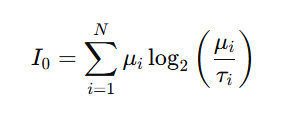

### where ui is the estimated occurence rate , ti is the uniform rate ( all cells are equally likely)

### I1 evaluates how well the estimated rates matches the actual training data (earthquake counts). It shows the realized skill of the model on known events

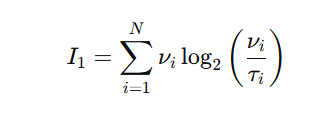

### where N is the number of original earthquake counts in the catalog and vi is the occurrence rate given to those earthquakes by our model

### the plot shows that when assigned a uniform rate of occurrence the model will have to cover the whole spatial area in order to account for all the earthquakes(whereas in reality the earthquakes dont span across the whole region), but the Io curve being less than the uniform rate curve shows that the model has been able succesfully identify regions of high and low earthquakes and thus accounts for all the earthquakes without having to cover the whole spatial region. Finally the I1 curve which takes into consideration only those grid cells in which the actual earthquakes took place shows , is also less than the uniform rate curve explains that the model has worked better in assigning the rates than just assigning same to all.

In [38]:
import pandas as pd

# Read the .dat file
gear1_df = pd.read_csv('GEAR1495_California.dat')

# View first few rows
print(gear1_df.head())


   Unnamed: 0  longitude  latitude          m495          m505          m515  \
0           0     -125.4      40.1  1.800883e-10  1.430492e-10  1.136280e-10   
1           1     -125.4      40.2  1.864519e-10  1.481040e-10  1.176432e-10   
2           2     -125.4      40.3  2.464803e-10  1.957862e-10  1.555185e-10   
3           3     -125.4      40.4  2.634356e-10  2.092543e-10  1.662166e-10   
4           4     -125.4      40.5  2.450313e-10  1.946352e-10  1.546043e-10   

           m525          m535          m545          m555  ...          m805  \
0  9.025796e-11  7.169444e-11  5.694892e-11  4.523614e-11  ...  6.557759e-14   
1  9.344733e-11  7.422785e-11  5.896128e-11  4.683461e-11  ...  7.208767e-14   
2  1.235328e-10  9.812557e-11  7.794391e-11  6.191305e-11  ...  1.007615e-13   
3  1.320306e-10  1.048756e-10  8.330565e-11  6.617203e-11  ...  1.133758e-13   
4  1.228065e-10  9.754870e-11  7.748569e-11  6.154907e-11  ...  1.105527e-13   

           m815          m825         

In [39]:
gear1_df

,Unnamed: 0,longitude,latitude,m495,m505,m515,m525,m535,m545,m555,...,m805,m815,m825,m835,m845,m855,m865,m875,m885,m895
0,0,-125.4,40.1,1.800883e-10,1.430492e-10,1.136280e-10,9.025796e-11,7.169444e-11,5.694892e-11,4.523614e-11,...,6.557759e-14,3.379494e-14,1.457950e-14,4.908359e-15,1.168323e-15,1.768990e-16,1.825004e-17,1.317620e-18,3.500530e-20,1.029474e-21
1,1,-125.4,40.2,1.864519e-10,1.481040e-10,1.176432e-10,9.344733e-11,7.422785e-11,5.896128e-11,4.683461e-11,...,7.208767e-14,3.811012e-14,1.704086e-14,6.037849e-15,1.545085e-15,2.595478e-16,3.117841e-17,2.837316e-18,1.169950e-19,1.143170e-21
2,2,-125.4,40.3,2.464803e-10,1.957862e-10,1.555185e-10,1.235328e-10,9.812557e-11,7.794391e-11,6.191305e-11,...,1.007615e-13,5.453342e-14,2.520757e-14,9.354759e-15,2.549340e-15,4.626629e-16,6.032699e-17,6.530251e-18,3.661517e-19,6.747118e-21
3,3,-125.4,40.4,2.634356e-10,2.092543e-10,1.662166e-10,1.320306e-10,1.048756e-10,8.330565e-11,6.617203e-11,...,1.133758e-13,6.270633e-14,2.988741e-14,1.158568e-14,3.358396e-15,6.651544e-16,9.826775e-17,1.270397e-17,9.203733e-19,2.492602e-20
4,4,-125.4,40.5,2.450313e-10,1.946352e-10,1.546043e-10,1.228065e-10,9.754870e-11,7.748569e-11,6.154907e-11,...,1.105527e-13,6.237104e-14,3.056708e-14,1.231821e-14,3.765210e-15,7.947851e-16,1.239409e-16,1.815803e-17,1.647395e-18,6.171553e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,7677,-113.3,34.3,6.002443e-12,4.767910e-12,3.787285e-12,3.008348e-12,2.389615e-12,1.898139e-12,1.507745e-12,...,3.075604e-16,8.847151e-17,4.760789e-17,2.348949e-17,1.047741e-17,3.971372e-18,1.143596e-18,2.171709e-19,2.277359e-20,1.031266e-21
7678,7678,-113.3,34.4,5.839166e-12,4.638215e-12,3.684265e-12,2.926516e-12,2.324614e-12,1.846507e-12,1.466732e-12,...,3.024234e-16,8.847262e-17,4.761009e-17,2.348790e-17,1.047526e-17,3.971392e-18,1.143240e-18,2.171988e-19,2.276942e-20,1.031005e-21
7679,7679,-113.2,34.1,5.602546e-12,4.450260e-12,3.534968e-12,2.807925e-12,2.230414e-12,1.771681e-12,1.407296e-12,...,2.888848e-16,8.203698e-17,4.515432e-17,2.285170e-17,1.038315e-17,3.965589e-18,1.143426e-18,2.172049e-19,2.277184e-20,1.031307e-21
7680,7680,-113.2,34.2,5.456998e-12,4.334647e-12,3.443133e-12,2.734978e-12,2.172470e-12,1.725654e-12,1.370736e-12,...,2.844701e-16,8.203001e-17,4.514842e-17,2.284918e-17,1.038079e-17,3.965535e-18,1.143509e-18,2.171874e-19,2.277243e-20,1.031040e-21


In [44]:
gear1_m495 = gear1_df[["longitude","latitude","m495"]]

In [45]:
gear1_m495

,longitude,latitude,m495
0,-125.4,40.1,1.800883e-10
1,-125.4,40.2,1.864519e-10
2,-125.4,40.3,2.464803e-10
3,-125.4,40.4,2.634356e-10
4,-125.4,40.5,2.450313e-10
...,...,...,...
7677,-113.3,34.3,6.002443e-12
7678,-113.3,34.4,5.839166e-12
7679,-113.2,34.1,5.602546e-12
7680,-113.2,34.2,5.456998e-12


In [ ]:
california_df = pd.r

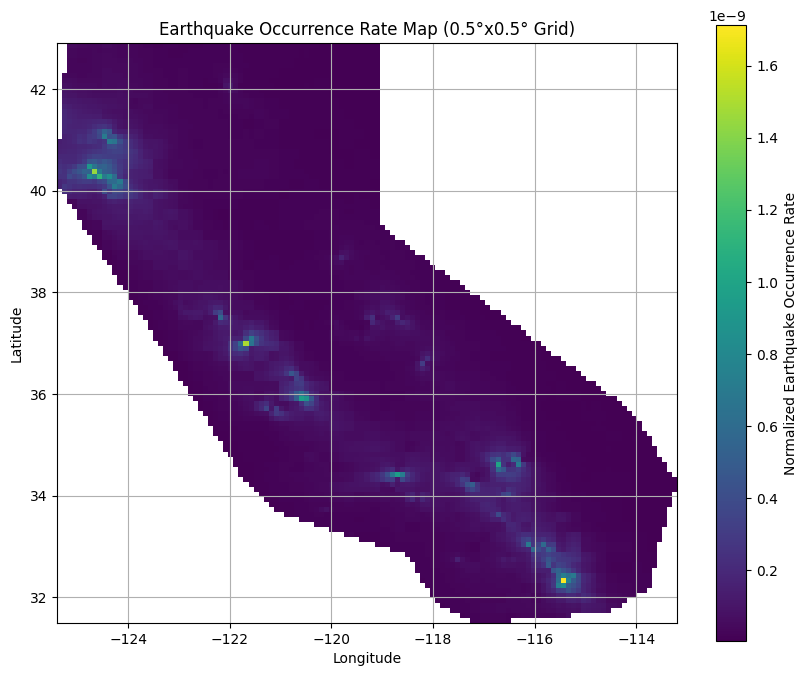

In [47]:
heatmap_df = gear1_m495.pivot(index='latitude', columns='longitude', values='m495')
heatmap_df = heatmap_df.sort_index(ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(heatmap_df, cmap='viridis', extent=[
    gear1_m495['longitude'].min(), gear1_m495['longitude'].max(),
    gear1_m495['latitude'].min(), gear1_m495['latitude'].max()
])
plt.colorbar(label='Normalized Earthquake Occurrence Rate')
plt.title('Earthquake Occurrence Rate Map (0.5°x0.5° Grid)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [72]:
gear1_global = pd.read_csv("GEAR1.dat", delim_whitespace=True, header=None)

C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\1181377697.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gear1_global = pd.read_csv("GEAR1.dat", delim_whitespace=True, header=None)


In [73]:
gear1_global

,0
0,"longitude,latitude,5.95,6.05,6.15,6.25,6.35,6...."
1,"-179.95,-89.95,2.7889964181664814e-15,2.239164..."
2,"-179.95,-89.85,2.7891712251786901e-15,2.239277..."
3,"-179.95,-89.75,2.7893389136311799e-15,2.239321..."
4,"-179.95,-89.65,2.7893158728935478e-15,2.239375..."
...,...
6479996,"179.95,89.55,6.9888301940417592e-15,5.57836117..."
6479997,"179.95,89.65,7.037964551894031e-15,5.615545442..."
6479998,"179.95,89.75,7.0735900810370813e-15,5.64196433..."
6479999,"179.95,89.85,7.1091760946381653e-15,5.66830658..."


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Read the file correctly
gear1_global = pd.read_csv("GEAR1.dat", delim_whitespace=True, header=None)

# Step 2: Split the single column (if still joined into one) using comma or whitespace
# If it's whitespace-separated data:
gear1_global = gear1_global[0].str.split(',', expand=True)  # If comma-separated
# OR
# gear1_global = gear1_global[0].str.split(expand=True)     # If whitespace-separated

# Step 3: Define column names
column_names = ["longitude", "latitude"] + [f"m{int(mag*10):02d}" for mag in np.arange(5.95, 9.95 + 0.1, 0.10)]

# Step 4: Assign the column names
gear1_global.columns = column_names


In [75]:
gear1_global = gear1_global[0].str.split(',', expand=True)  # If comma-separated


In [77]:
gear1_global

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,longitude,latitude,5.95,6.05,6.15,6.25,6.35,6.45,6.55,6.65,...,8.05,8.158.25,8.35,8.45,8.55,8.65,8.75,8.85,8.95,None
1,-179.95,-89.95,2.7889964181664814e-15,2.2391643663809427e-15,1.7976273679224161e-15,1.4430745881369698e-15,1.1583303720631826e-15,9.2961637489915692e-16,7.4591037970124384e-16,5.9830262938597582e-16,...,1.7908351934652795e-17,1.199393617035268e-17,7.4536426733537125e-18,4.1671427059148761e-18,2.0067604837810418e-18,7.8236005739593139e-19,2.2646575325332894e-19,4.3035333514709091e-20,4.5121866482407264e-21,2.0428104802372547e-22
2,-179.95,-89.85,2.7891712251786901e-15,2.239277383675529e-15,1.7977702390502615e-15,1.4432173676887067e-15,1.1584116102572887e-15,9.2966683266254179e-16,7.4592995769897821e-16,5.9832206667589274e-16,...,1.7908516980928446e-17,1.1993177528193477e-17,7.4525733165752639e-18,4.1672938373843625e-18,2.0066035118358961e-18,7.8250786933011587e-19,2.2649053029284489e-19,4.3029284899206216e-20,4.5122217474526344e-21,2.043118816030694e-22
3,-179.95,-89.75,2.7893389136311799e-15,2.2393214920124812e-15,1.797691005166766e-15,1.4431372876214129e-15,1.1583919556912515e-15,9.2967732031149991e-16,7.4597072034213138e-16,5.9838082732106615e-16,...,1.7910283534137038e-17,1.1994930301279893e-17,7.4537050544695325e-18,4.1671927738572158e-18,2.0068038379621495e-18,7.8258308243980451e-19,2.265032185854947e-19,4.3035472855595725e-20,4.5122009191164567e-21,2.0428171141201096e-22
4,-179.95,-89.65,2.7893158728935478e-15,2.2393751633041717e-15,1.7978217453674749e-15,1.4431357895670506e-15,1.1583896803227097e-15,9.2967427729858211e-16,7.4596707244860128e-16,5.983452114084382e-16,...,1.7911843039415527e-17,1.1996471695176777e-17,7.4549667627196314e-18,4.1679206822187401e-18,2.0067367790867634e-18,7.8245966632938525e-19,2.2648301180429048e-19,4.3038266083089402e-20,4.5122420624985427e-21,2.0430863213874786e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479996,179.95,89.55,6.9888301940417592e-15,5.5783611789096278e-15,4.4516187999982493e-15,3.5513480645643839e-15,2.8312124697474719e-15,2.2550837795042049e-15,1.7941808499714635e-15,1.4252340178422029e-15,...,1.7911295563928058e-17,1.1995898124216166e-17,7.454228835295386e-18,4.167897121061974e-18,2.0072865904487046e-18,7.8256666533023481e-19,2.2654379265891472e-19,4.3039924644018542e-20,4.5122764752143846e-21,2.0432411141356983e-22
6479997,179.95,89.65,7.037964551894031e-15,5.6155454423782621e-15,4.4801045943286513e-15,3.5728534528477877e-15,2.8473410499251265e-15,2.2672201040340593e-15,1.8032280349975812e-15,1.431877129729601e-15,...,1.7911843040218196e-17,1.1996471695714366e-17,7.4549667630537048e-18,4.1679206824055145e-18,2.0067367791766901e-18,7.8245966636444912e-19,2.264830118144397e-19,4.3038266085018047e-20,4.5122420627007465e-21,2.0430863214790339e-22
6479998,179.95,89.75,7.0735900810370813e-15,5.6419643352653033e-15,4.4994929247127035e-15,3.5870226994628543e-15,2.8577071712065984e-15,2.2746226839270752e-15,1.8083752026418483e-15,1.4354509270519313e-15,...,1.7910283535350537e-17,1.19949303020926e-17,7.453705054974553e-18,4.167192774139561e-18,2.006803838098119e-18,7.8258308249282787e-19,2.2650321860084128e-19,4.3035472858511559e-20,4.512200919422177e-21,2.0428171142585191e-22
6479999,179.95,89.85,7.1091760946381653e-15,5.6683065870099007e-15,4.5189184484414727e-15,3.601305941258249e-15,2.8680121751778635e-15,2.2819890947960877e-15,1.8135383270612456e-15,1.4387779508206761e-15,...,1.7908516980763296e-17,1.1993177528082879e-17,7.4525733165065374e-18,4.1672938373459325e-18,2.0066035118173917e-18,7.8250786932289979e-19,2.2649053029075627e-19,4.3029284898809408e-20,4.5122217474110237e-21,2.043118816011853e-22


In [82]:
# Step 1: Set the first row (index 0) as column names
gear1_global.columns = gear1_global.iloc[0]

# Step 2: Drop the first row from the DataFrame (since it's now the header)
gear1_global = gear1_global.drop(index=0).reset_index(drop=True)


In [83]:
gear1_global

,longitude,latitude,5.95,6.05,6.15,6.25,6.35,6.45,6.55,6.65,...,8.05,8.158.25,8.35,8.45,8.55,8.65,8.75,8.85,8.95,None
0,-179.95,-89.95,2.7889964181664814e-15,2.2391643663809427e-15,1.7976273679224161e-15,1.4430745881369698e-15,1.1583303720631826e-15,9.2961637489915692e-16,7.4591037970124384e-16,5.9830262938597582e-16,...,1.7908351934652795e-17,1.199393617035268e-17,7.4536426733537125e-18,4.1671427059148761e-18,2.0067604837810418e-18,7.8236005739593139e-19,2.2646575325332894e-19,4.3035333514709091e-20,4.5121866482407264e-21,2.0428104802372547e-22
1,-179.95,-89.85,2.7891712251786901e-15,2.239277383675529e-15,1.7977702390502615e-15,1.4432173676887067e-15,1.1584116102572887e-15,9.2966683266254179e-16,7.4592995769897821e-16,5.9832206667589274e-16,...,1.7908516980928446e-17,1.1993177528193477e-17,7.4525733165752639e-18,4.1672938373843625e-18,2.0066035118358961e-18,7.8250786933011587e-19,2.2649053029284489e-19,4.3029284899206216e-20,4.5122217474526344e-21,2.043118816030694e-22
2,-179.95,-89.75,2.7893389136311799e-15,2.2393214920124812e-15,1.797691005166766e-15,1.4431372876214129e-15,1.1583919556912515e-15,9.2967732031149991e-16,7.4597072034213138e-16,5.9838082732106615e-16,...,1.7910283534137038e-17,1.1994930301279893e-17,7.4537050544695325e-18,4.1671927738572158e-18,2.0068038379621495e-18,7.8258308243980451e-19,2.265032185854947e-19,4.3035472855595725e-20,4.5122009191164567e-21,2.0428171141201096e-22
3,-179.95,-89.65,2.7893158728935478e-15,2.2393751633041717e-15,1.7978217453674749e-15,1.4431357895670506e-15,1.1583896803227097e-15,9.2967427729858211e-16,7.4596707244860128e-16,5.983452114084382e-16,...,1.7911843039415527e-17,1.1996471695176777e-17,7.4549667627196314e-18,4.1679206822187401e-18,2.0067367790867634e-18,7.8245966632938525e-19,2.2648301180429048e-19,4.3038266083089402e-20,4.5122420624985427e-21,2.0430863213874786e-22
4,-179.95,-89.55,2.7893782011220378e-15,2.2394788146278628e-15,1.7978651038889954e-15,1.4432065819759957e-15,1.1583572766064573e-15,9.2964086139580407e-16,7.4593285004518551e-16,5.9835409452397836e-16,...,1.7911295564854214e-17,1.1995898124836451e-17,7.4542288356808309e-18,4.1678971212774879e-18,2.0072865905524976e-18,7.8256666537069985e-19,2.2654379267062885e-19,4.3039924646244057e-20,4.5122764754477064e-21,2.0432411142413503e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479995,179.95,89.55,6.9888301940417592e-15,5.5783611789096278e-15,4.4516187999982493e-15,3.5513480645643839e-15,2.8312124697474719e-15,2.2550837795042049e-15,1.7941808499714635e-15,1.4252340178422029e-15,...,1.7911295563928058e-17,1.1995898124216166e-17,7.454228835295386e-18,4.167897121061974e-18,2.0072865904487046e-18,7.8256666533023481e-19,2.2654379265891472e-19,4.3039924644018542e-20,4.5122764752143846e-21,2.0432411141356983e-22
6479996,179.95,89.65,7.037964551894031e-15,5.6155454423782621e-15,4.4801045943286513e-15,3.5728534528477877e-15,2.8473410499251265e-15,2.2672201040340593e-15,1.8032280349975812e-15,1.431877129729601e-15,...,1.7911843040218196e-17,1.1996471695714366e-17,7.4549667630537048e-18,4.1679206824055145e-18,2.0067367791766901e-18,7.8245966636444912e-19,2.264830118144397e-19,4.3038266085018047e-20,4.5122420627007465e-21,2.0430863214790339e-22
6479997,179.95,89.75,7.0735900810370813e-15,5.6419643352653033e-15,4.4994929247127035e-15,3.5870226994628543e-15,2.8577071712065984e-15,2.2746226839270752e-15,1.8083752026418483e-15,1.4354509270519313e-15,...,1.7910283535350537e-17,1.19949303020926e-17,7.453705054974553e-18,4.167192774139561e-18,2.006803838098119e-18,7.8258308249282787e-19,2.2650321860084128e-19,4.3035472858511559e-20,4.512200919422177e-21,2.0428171142585191e-22
6479998,179.95,89.85,7.1091760946381653e-15,5.6683065870099007e-15,4.5189184484414727e-15,3.601305941258249e-15,2.8680121751778635e-15,2.2819890947960877e-15,1.8135383270612456e-15,1.4387779508206761e-15,...,1.7908516980763296e-17,1.1993177528082879e-17,7.4525733165065374e-18,4.1672938373459325e-18,2.0066035118173917e

In [53]:
df.describe()

,latitude,longitude,depth,mag,kappa
count,3164.000000,3164.000000,3164.000000,3164.000000,3091.000000
mean,30.253489,88.758315,32.894370,4.851277,1009.288420
std,3.587200,6.065926,26.455762,0.382167,152.016354
min,24.003100,77.011000,2.000000,4.500000,835.708491
25%,27.380250,83.358000,10.000000,4.600000,916.902596
50%,30.269500,89.157550,33.000000,4.800000,967.314571
75%,33.251575,94.753525,34.112500,5.000000,1054.346212
max,36.998200,97.992500,182.900000,7.800000,2538.418457


In [87]:
# Define bounds for the Himalayan and Northeastern India region
min_lat, max_lat = 24.0, 37.0
min_lon, max_lon = 77.0, 98.0


In [89]:
# Convert latitude and longitude columns to float
gear1_global["latitude"] = gear1_global["latitude"].astype(float)
gear1_global["longitude"] = gear1_global["longitude"].astype(float)


In [90]:
# Filter rows where lat-lon fall within the desired bounds
gear1_himalaya_ne_df = gear1_global[
    (gear1_global["latitude"] >= min_lat) &
    (gear1_global["latitude"] <= max_lat) &
    (gear1_global["longitude"] >= min_lon) &
    (gear1_global["longitude"] <= max_lon)
]

# View a few rows to confirm
print(gear1_himalaya_ne_df.head())


0        longitude  latitude                    5.95                    6.05  \
4627140      77.05     24.05  1.2323995675159158e-14  9.8900288240538936e-15   
4627141      77.05     24.15  1.3134594424435958e-14  1.0540643118891129e-14   
4627142      77.05     24.25  1.3095840116494531e-14  1.0509678305918396e-14   
4627143      77.05     24.35  1.3067243248705199e-14  1.0487096924386351e-14   
4627144      77.05     24.45  1.3039530429749065e-14  1.0464508278494881e-14   

0                          6.15                    6.25  \
4627140  7.9371731996572823e-15  6.3677880895155586e-15   
4627141  8.4592639678122814e-15  6.7874098050042571e-15   
4627142   8.434704571001191e-15    6.76779016282712e-15   
4627143  8.4167504717888715e-15  6.7530002025041725e-15   
4627144  8.3979032632740406e-15  6.7382072806383794e-15   

0                          6.35                    6.45  \
4627140  5.1064210540778647e-15  4.0918240034201636e-15   
4627141  5.4424642418238856e-15  4.36135495325

In [91]:
gear1_himalaya_ne_df

,longitude,latitude,5.95,6.05,6.15,6.25,6.35,6.45,6.55,6.65,...,8.05,8.158.25,8.35,8.45,8.55,8.65,8.75,8.85,8.95,None
4627140,77.05,24.05,1.2323995675159158e-14,9.8900288240538936e-15,7.9371731996572823e-15,6.3677880895155586e-15,5.1064210540778647e-15,4.0918240034201636e-15,3.2759745699815097e-15,2.6197261494815014e-15,...,1.8114889079167966e-17,1.2132051523116951e-17,7.5392908323898138e-18,4.2149980155728967e-18,2.029576463328981e-18,7.9128879132428379e-19,2.2904398309354695e-19,4.3522749663503076e-20,4.5632896422932663e-21,2.0664756738915474e-22
4627141,77.05,24.15,1.3134594424435958e-14,1.0540643118891129e-14,8.4592639678122814e-15,6.7874098050042571e-15,5.4424642418238856e-15,4.3613549532555773e-15,3.4918488840697582e-15,2.7924593357465075e-15,...,1.8113945098613303e-17,1.2131868914132608e-17,7.5391547790867877e-18,4.214989459833359e-18,2.0296752944421252e-18,7.9133040346949952e-19,2.2910054033266239e-19,4.3526487393306194e-20,4.5639313530673636e-21,2.0662770436683452e-22
4627142,77.05,24.25,1.3095840116494531e-14,1.0509678305918396e-14,8.434704571001191e-15,6.76779016282712e-15,5.4271472532577229e-15,4.3487647030056965e-15,3.4817919441629403e-15,2.784443878341237e-15,...,1.8113844004584243e-17,1.2131624962334696e-17,7.5389425924490616e-18,4.2148949235439677e-18,2.0296817075160571e-18,7.9127589223259946e-19,2.2905920602091426e-19,4.3520588617525985e-20,4.5636986567371879e-21,2.066084200986899e-22
4627143,77.05,24.35,1.3067243248705199e-14,1.0487096924386351e-14,8.4167504717888715e-15,6.7530002025041725e-15,5.4148828191826719e-15,4.3392279442091414e-15,3.4741669559033072e-15,2.7783278515686542e-15,...,1.8112918368528993e-17,1.2130535210234981e-17,7.5378727532226659e-18,4.2139313904731533e-18,2.0288135408458151e-18,7.9123257790018214e-19,2.2902740559399547e-19,4.352370606967523e-20,4.5634798738283512e-21,2.0658973042384522e-22
4627144,77.05,24.45,1.3039530429749065e-14,1.0464508278494881e-14,8.3979032632740406e-15,6.7382072806383794e-15,5.4035050620573976e-15,4.3296885439528864e-15,3.4665396672689405e-15,2.7722988332618151e-15,...,1.8111235437002077e-17,1.2129561491083385e-17,7.5377942881141045e-18,4.2139498454454037e-18,2.0289207828266342e-18,7.9127190628170531e-19,2.2907645862117709e-19,4.3518144123740955e-20,4.5633633570477724e-21,2.0666067628422685e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003465,97.95,36.55,1.9979671043275717e-13,1.5997971718107338e-13,1.2810397348768716e-13,1.0254904203912548e-13,8.204672345900184e-14,6.5590504638958904e-14,5.2385275649492183e-14,4.1786867368930543e-14,...,1.4932319947289324e-16,4.1527451264691181e-17,1.4573476814056876e-17,6.8838459720716956e-18,2.8810101063965092e-18,1.0149659050847549e-18,2.7046064882372234e-19,4.7723018865754218e-20,4.7355649988846074e-21,2.0834472742694036e-22
5003466,97.95,36.65,2.0185732231087448e-13,1.6162680062024976e-13,1.2942823509629064e-13,1.0360893123242065e-13,8.2888990957517176e-14,6.6260641191739451e-14,5.2917644223248979e-14,4.2215032796820039e-14,...,1.509352549123942e-16,4.1994319279821952e-17,1.457264531755303e-17,6.8832915214515852e-18,2.880393048067412e-18,1.0149936448819081e-18,2.70547161877786e-19,4.7727212345456695e-20,4.7353526343598402e-21,2.08408723068057e-22
5003467,97.95,36.75,2.1274987950711824e-13,1.7028828953771877e-13,1.3630286713199857e-13,1.0906810062100069e-13,8.7221766652333497e-14,6.9694259439085357e-14,5.5627847786245258e-14,4.4346458423220388e-14,...,1.4542958734346863e-16,3.9174679938818006e-17,1.2706816386570599e-17,5.6100385552478333e-18,2.2397495781163181e-18,8.0384525558449741e-19,2.2877719361340013e-19,4.341133225457787e-20,4.5521092886453292e-21,2.0605176074347166e-22
5003468,97.95,36.85,2.1398117787632495e-13,1.7127308518168293e-13,1.370924761866267e-13,1.097015063021598e-13,8.7726085727594724e-14,7.0095239868689922e-14,5.5950140775647369e-14,4.460375273733106e-14,...,1.4631754724871504e-16,3.9421037132211549e-17,1.2707011898604286e-17,5.6102132353563894e-18,2.23963859

TypeError: cannot do slice indexing on Index with these indexers [5.95] of type str

In [98]:
heatmap_df

,lat_bin,lon_bin,M_ge_5.95_rate
0,24.0,77.0,0.0
1,24.0,77.2,0.0
2,24.0,77.4,0.0
3,24.0,77.6,0.0
4,24.0,77.8,0.0
...,...,...,...
6991,37.0,97.2,0.0
6992,37.0,97.4,0.0
6993,37.0,97.6,0.0
6994,37.0,97.8,0.0


In [ ]:
# Convert all magnitude columns (from '5.95' to '8.95') to float
mag_cols = [col for col in gear1_himalaya_ne_df.columns if col not in ['longitude', 'latitude']]
gear1_himalaya_ne_df[mag_cols] = gear1_himalaya_ne_df[mag_cols].apply(pd.to_numeric, errors='coerce')




C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\101869670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gear1_himalaya_ne_df[mag_cols] = gear1_himalaya_ne_df[mag_cols].apply(pd.to_numeric, errors='coerce')
C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\101869670.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gear1_himalaya_ne_df['M_ge_5.95_rate'] = gear1_himalaya_ne_df[mag_cols].sum(axis=1)


In [103]:
gear1_himalaya_ne_df.head()

,longitude,latitude,5.95,6.05,6.15,6.25,6.35,6.45,6.55,6.65,...,8.55,8.65,8.75,8.85,8.95,None,rate_sum,M_ge_5.95_rate,lat_bin,lon_bin
4627140,77.05,24.05,1.232400e-14,9.890029e-15,7.937173e-15,6.367788e-15,5.106421e-15,4.091824e-15,3.275975e-15,2.619726e-15,...,2.029576e-18,7.912888e-19,2.290440e-19,4.352275e-20,4.563290e-21,2.066476e-22,0.0,101.0,24.0,77.0
4627141,77.05,24.15,1.313459e-14,1.054064e-14,8.459264e-15,6.787410e-15,5.442464e-15,4.361355e-15,3.491849e-15,2.792459e-15,...,2.029675e-18,7.913304e-19,2.291005e-19,4.352649e-20,4.563931e-21,2.066277e-22,0.0,101.2,24.2,77.0
4627142,77.05,24.25,1.309584e-14,1.050968e-14,8.434705e-15,6.767790e-15,5.427147e-15,4.348765e-15,3.481792e-15,2.784444e-15,...,2.029682e-18,7.912759e-19,2.290592e-19,4.352059e-20,4.563699e-21,2.066084e-22,0.0,101.2,24.2,77.0
4627143,77.05,24.35,1.306724e-14,1.048710e-14,8.416750e-15,6.753000e-15,5.414883e-15,4.339228e-15,3.474167e-15,2.778328e-15,...,2.028814e-18,7.912326e-19,2.290274e-19,4.352371e-20,4.563480e-21,2.065897e-22,0.0,101.4,24.4,77.0
4627144,77.05,24.45,1.303953e-14,1.046451e-14,8.397903e-15,6.738207e-15,5.403505e-15,4.329689e-15,3.466540e-15,2.772299e-15,...,2.028921e-18,7.912719e-19,2.290765e-19,4.351814e-20,4.563363e-21,2.066607e-22,0.0,101.4,24.4,77.0


In [104]:
# Define magnitude threshold
magnitude_threshold = 5.95
rate_columns = [col for col in gear1_himalaya_ne_df.columns if col not in ['longitude', 'latitude','M_ge_5.95_rate','lat_bin','lon_bin','rate_sum']]
# rate_columns = [col for col in rate_columns if float(col) >= magnitude_threshold]

# Create summed rate column
gear1_himalaya_ne_df['M_ge_5.95_rate'] = gear1_himalaya_ne_df[rate_columns].sum(axis=1)

C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\946904604.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gear1_himalaya_ne_df['M_ge_5.95_rate'] = gear1_himalaya_ne_df[rate_columns].sum(axis=1)


In [105]:
gear1_himalaya_ne_df['M_ge_5.95_rate']

4627140    6.062642e-14
4627141    6.461988e-14
4627142    6.443194e-14
4627143    6.429142e-14
4627144    6.415275e-14
               ...     
5003465    9.731109e-13
5003466    9.831195e-13
5003467    1.033873e-12
5003468    1.039864e-12
5003469    1.147155e-12
Name: M_ge_5.95_rate, Length: 27300, dtype: float64

In [106]:
# Bin into 0.5°x0.5° grids
gear1_himalaya_ne_df['lat_bin'] = (gear1_himalaya_ne_df['latitude'] // 0.5) * 0.5
gear1_himalaya_ne_df['lon_bin'] = (gear1_himalaya_ne_df['longitude'] // 0.5) * 0.5

# Group by bins and sum the rates
heatmap_df = gear1_himalaya_ne_df.groupby(['lat_bin', 'lon_bin'])['M_ge_5.95_rate'].sum().reset_index()

C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\1834918264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gear1_himalaya_ne_df['lat_bin'] = (gear1_himalaya_ne_df['latitude'] // 0.5) * 0.5
C:\Users\aayan\AppData\Local\Temp\ipykernel_45132\1834918264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gear1_himalaya_ne_df['lon_bin'] = (gear1_himalaya_ne_df['longitude'] // 0.5) * 0.5


In [114]:
gear1_himalaya_ne_df['M_ge_5.95_rate'].describe()

count    2.730000e+04
mean     1.908661e-12
std      2.517379e-12
min      6.062642e-14
25%      9.566545e-13
50%      1.442052e-12
75%      2.208321e-12
max      9.215024e-11
Name: M_ge_5.95_rate, dtype: float64

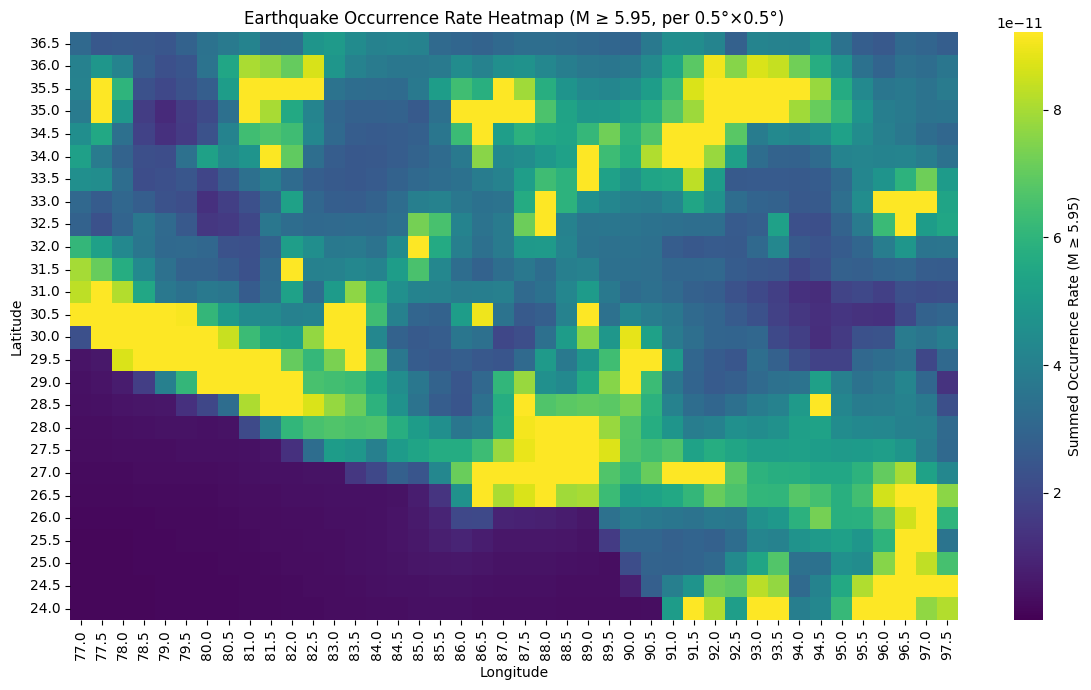

In [119]:
# STEP 4: Group and sum within each 0.5°×0.5° cell
heatmap_df = (
    gear1_himalaya_ne_df
    .groupby(['lat_bin', 'lon_bin'])['M_ge_5.95_rate']
    .sum()
    .reset_index()
)

# STEP 5: Pivot to form 2D matrix for heatmap
heatmap_grid = heatmap_df.pivot(index='lat_bin', columns='lon_bin', values='M_ge_5.95_rate')
heatmap_grid = heatmap_grid.sort_index(ascending=True)  # latitude ascending (South to North)

# STEP 6: Plot the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    heatmap_grid,
    cmap='viridis',                        # Color scheme similar to your scale
    vmin=0.00000000000006062642,                          # Minimum color value
    vmax=0.00000000009215024,                          # Maximum color value
    cbar_kws={'label': 'Summed Occurrence Rate (M ≥ 5.95)'},
    linewidths=0.001
)
plt.title("Earthquake Occurrence Rate Heatmap (M ≥ 5.95, per 0.5°×0.5°)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.gca().invert_yaxis()

plt.show()

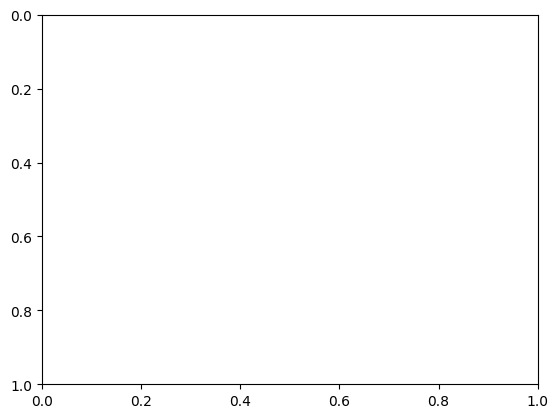

In [118]:
plt.gca().invert_yaxis()
